# [LAB-01] 비지도학습 > 군집분석 > KMeans > 성능평가

## #01. 준비작업
### [1] 패키지 참조

In [23]:
# 라이브러리 기본 참조
from hossam import load_data,my_dpi
from pandas import DataFrame,get_dummies,merge

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

import seaborn as sb
import numpy as np

# 클러스터링 관련 참조
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.spatial import ConvexHull

import matplotlib.cm as cm

#Elbow Point 계산 라이브러리
from kneed import KneeLocator

#정규성 검정 라이브러리
from scipy.stats import normaltest

#데이터 전처리 라이브러리
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#실루엣 스코어 라이브러리
from sklearn.metrics import silhouette_samples,silhouette_score
my_dpi = 200# [LAB-01] 비지도학습 > 군집분석 > KMeans > 활용예제

### [2] 데이터 가져오기

In [15]:
origin = load_data('iris')
origin.head()

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### [3] 데이터 전처리


In [16]:
df = origin.drop('Species',axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## #02. 실루엣 스코어
- 각 군집간의 거리가 얼마나 효율적으로 분리되었는지, 다른 군집과 명확히 구분되는지를 나타내는 지표
- 특징
  - 값범위 -1 ~ 1
  - 평균값으로 k 간 비교 가능
  - 해석 가능한 수치
    - 1에 가까울수록 좋은 군집
    - 0인 경우는 클러스터가 겹치는 것을 의미
    - 음수값은 일반적으로 샘플이 잘못된 클러스터에 할당되었음을 의미

| 구분 | 이너셔 (Inertia) | 엘보우 (Elbow) | 실루엣 (Silhouette) |
|----|------------------|----------------|---------------------|
| 평가 관점 | 성능(오차) | 성능 변화 해석 | 구조(품질) |
| 측정 대상 | 군집 내부 응집도 | 이너셔 감소 추세 | 응집도 + 분리도 |
| 값 해석 | 상대 비교만 가능 | 시각적·주관적 | 해석 가능 |
| k 증가 영향 | 항상 감소 | 감소폭이 완만해짐 | 증가·감소 가능 |
| 주관성 | 낮음 | 높음 | 낮음 |
| 단독 사용 | k 선택 불가 | k 후보 탐색 가능 | k 선택 가능 |


#### [1] 군집 분석 수행
- 앞 단원예제를 통해 최적의 k 는 4로 도출되었음
- 엘보우 포인트를 우선 구한다음 실루엣 계수를 구할 수 있음

In [17]:
best_k = 4

In [18]:
estimator = KMeans(n_clusters = best_k) #모델 객체 생성
estimator.fit(df)  #모델 학습
cluster = estimator.predict(df) #예측
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3,
       1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1], dtype=int32)

#### [2] 각 포인트에 대한 실루엣 계수 구하기
- 독립변수만으로 구성된 데이터 프레임 필요

In [19]:
s_samples = silhouette_samples(X=df , labels = cluster)
s_samples

array([0.82983811, 0.78308343, 0.80107439, 0.77023104, 0.8260145 ,
       0.71142073, 0.79219252, 0.82949354, 0.7085028 , 0.79450277,
       0.77415413, 0.80746068, 0.77762018, 0.7061819 , 0.66838385,
       0.60531333, 0.74581637, 0.82739004, 0.66554987, 0.79339577,
       0.7475919 , 0.79884782, 0.76372127, 0.75569427, 0.73246417,
       0.76100725, 0.8042103 , 0.81672465, 0.81872101, 0.78485776,
       0.78105687, 0.76630148, 0.73141653, 0.68901157, 0.79819574,
       0.80557242, 0.76437216, 0.81754864, 0.72946133, 0.82551057,
       0.82602818, 0.57429012, 0.75154466, 0.76570033, 0.70471043,
       0.77593987, 0.78499716, 0.78821582, 0.79108004, 0.82757618,
       0.36930998, 0.33259562, 0.37965664, 0.55672231, 0.39203344,
       0.26490975, 0.42417741, 0.50114303, 0.35308837, 0.55611645,
       0.50398209, 0.24742993, 0.42701532, 0.28706896, 0.54627631,
       0.30508872, 0.17465733, 0.51814451, 0.02575921, 0.61079519,
       0.37162112, 0.35664328, 0.41023004, 0.15681863, 0.06789

#### [3] 전체 실루엣 계수에 대한 평균 스코어
- 보통 0.5 가 넘으면 꽤 좋은 수치라고 한다
  

In [20]:
s_score = silhouette_score (X=df , labels = cluster)
s_score

0.49535632852885064

#### [4] 실루엣 스코어 시각화 함수 정의

In [21]:
def visualize_silhouette(estimator, X_features):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

    sil_avg = silhouette_score(X=X_features, labels=estimator.labels_)
    sil_values = silhouette_samples(X=X_features, labels=estimator.labels_)

    y_lower = 10
    plt.suptitle(
        "Number of Cluster : " + str(estimator.n_clusters) + ", "
        "Silhouette Score :" + str(round(sil_avg, 3))
    )
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_features) + (estimator.n_clusters + 1) * 10])
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.grid()

    # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
    for i in range(estimator.n_clusters):
        ith_cluster_sil_values = sil_values[estimator.labels_ == i]
        ith_cluster_sil_values.sort()

        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / estimator.n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=sil_avg, color="red", linestyle="--")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(estimator.labels_.astype(float) / estimator.n_clusters)
    ax2.scatter(
        X_features[X_features.columns[0]],
        X_features[X_features.columns[1]],
        marker="o",
        s=30,
        lw=0,
        alpha=0.7,
        c=colors,
        edgecolor="k",
    )

    # Labeling the clusters
    centers = estimator.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="r",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid()

    plt.show()
    plt.close()

#### [5] 엘보우 포인트를 통해 도출한 k 값에 대한 실루엣 스코어 시각화

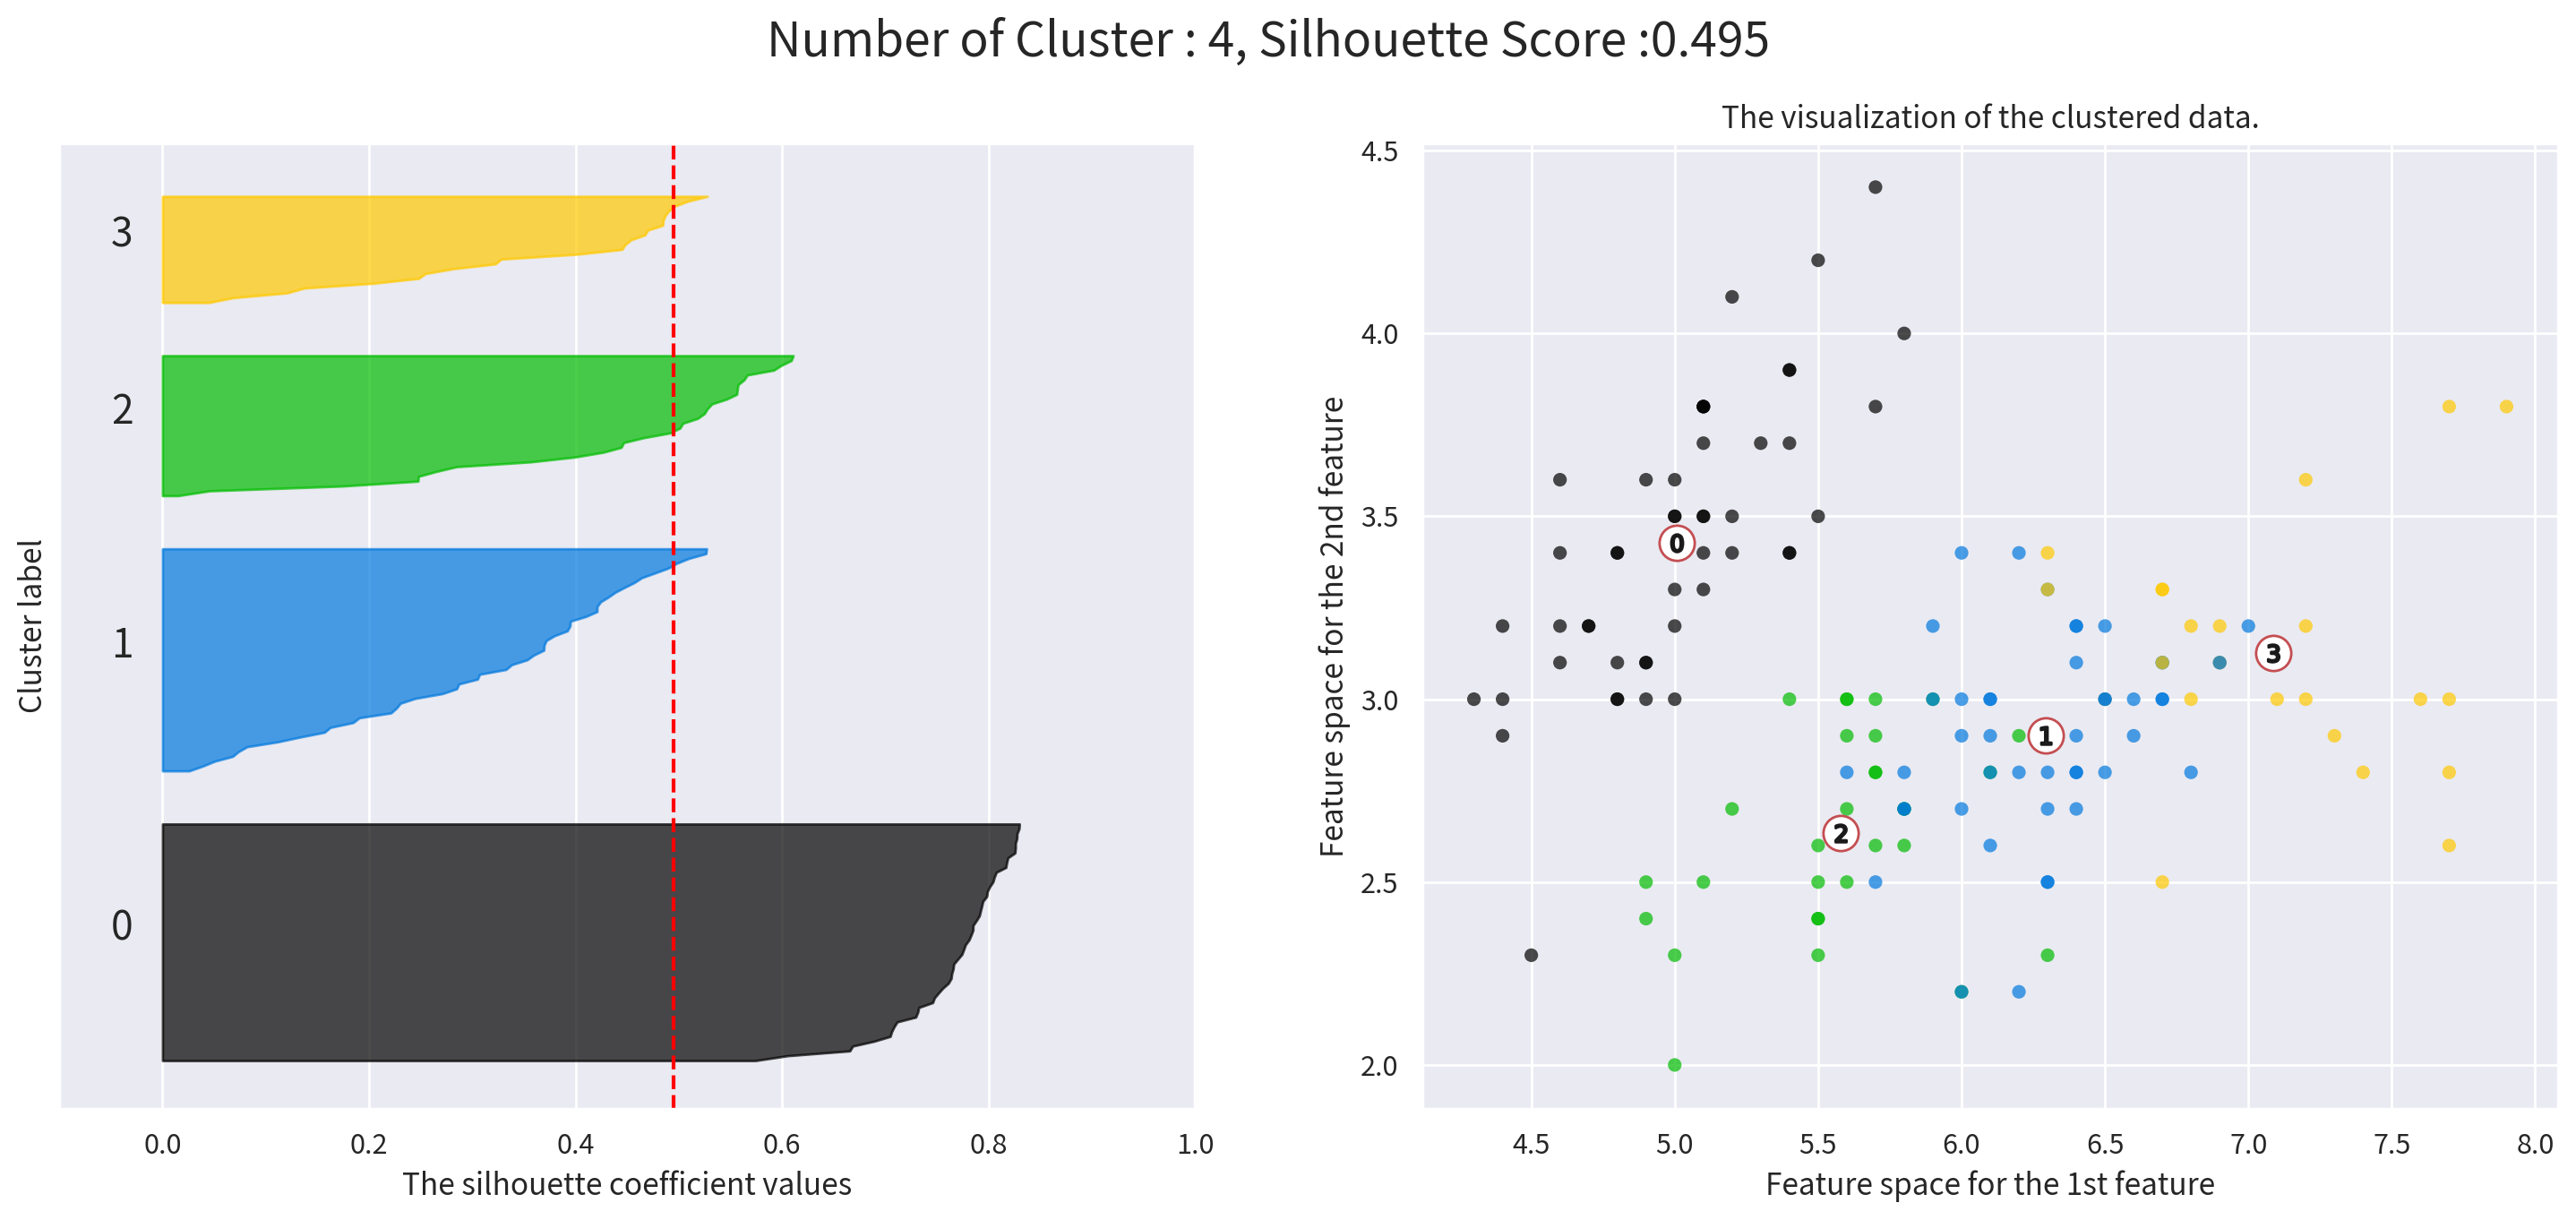

In [24]:
visualize_silhouette(estimator=estimator,X_features=df)

#### [6] k 값의 변화에 따른 실루엣 점수 시각화

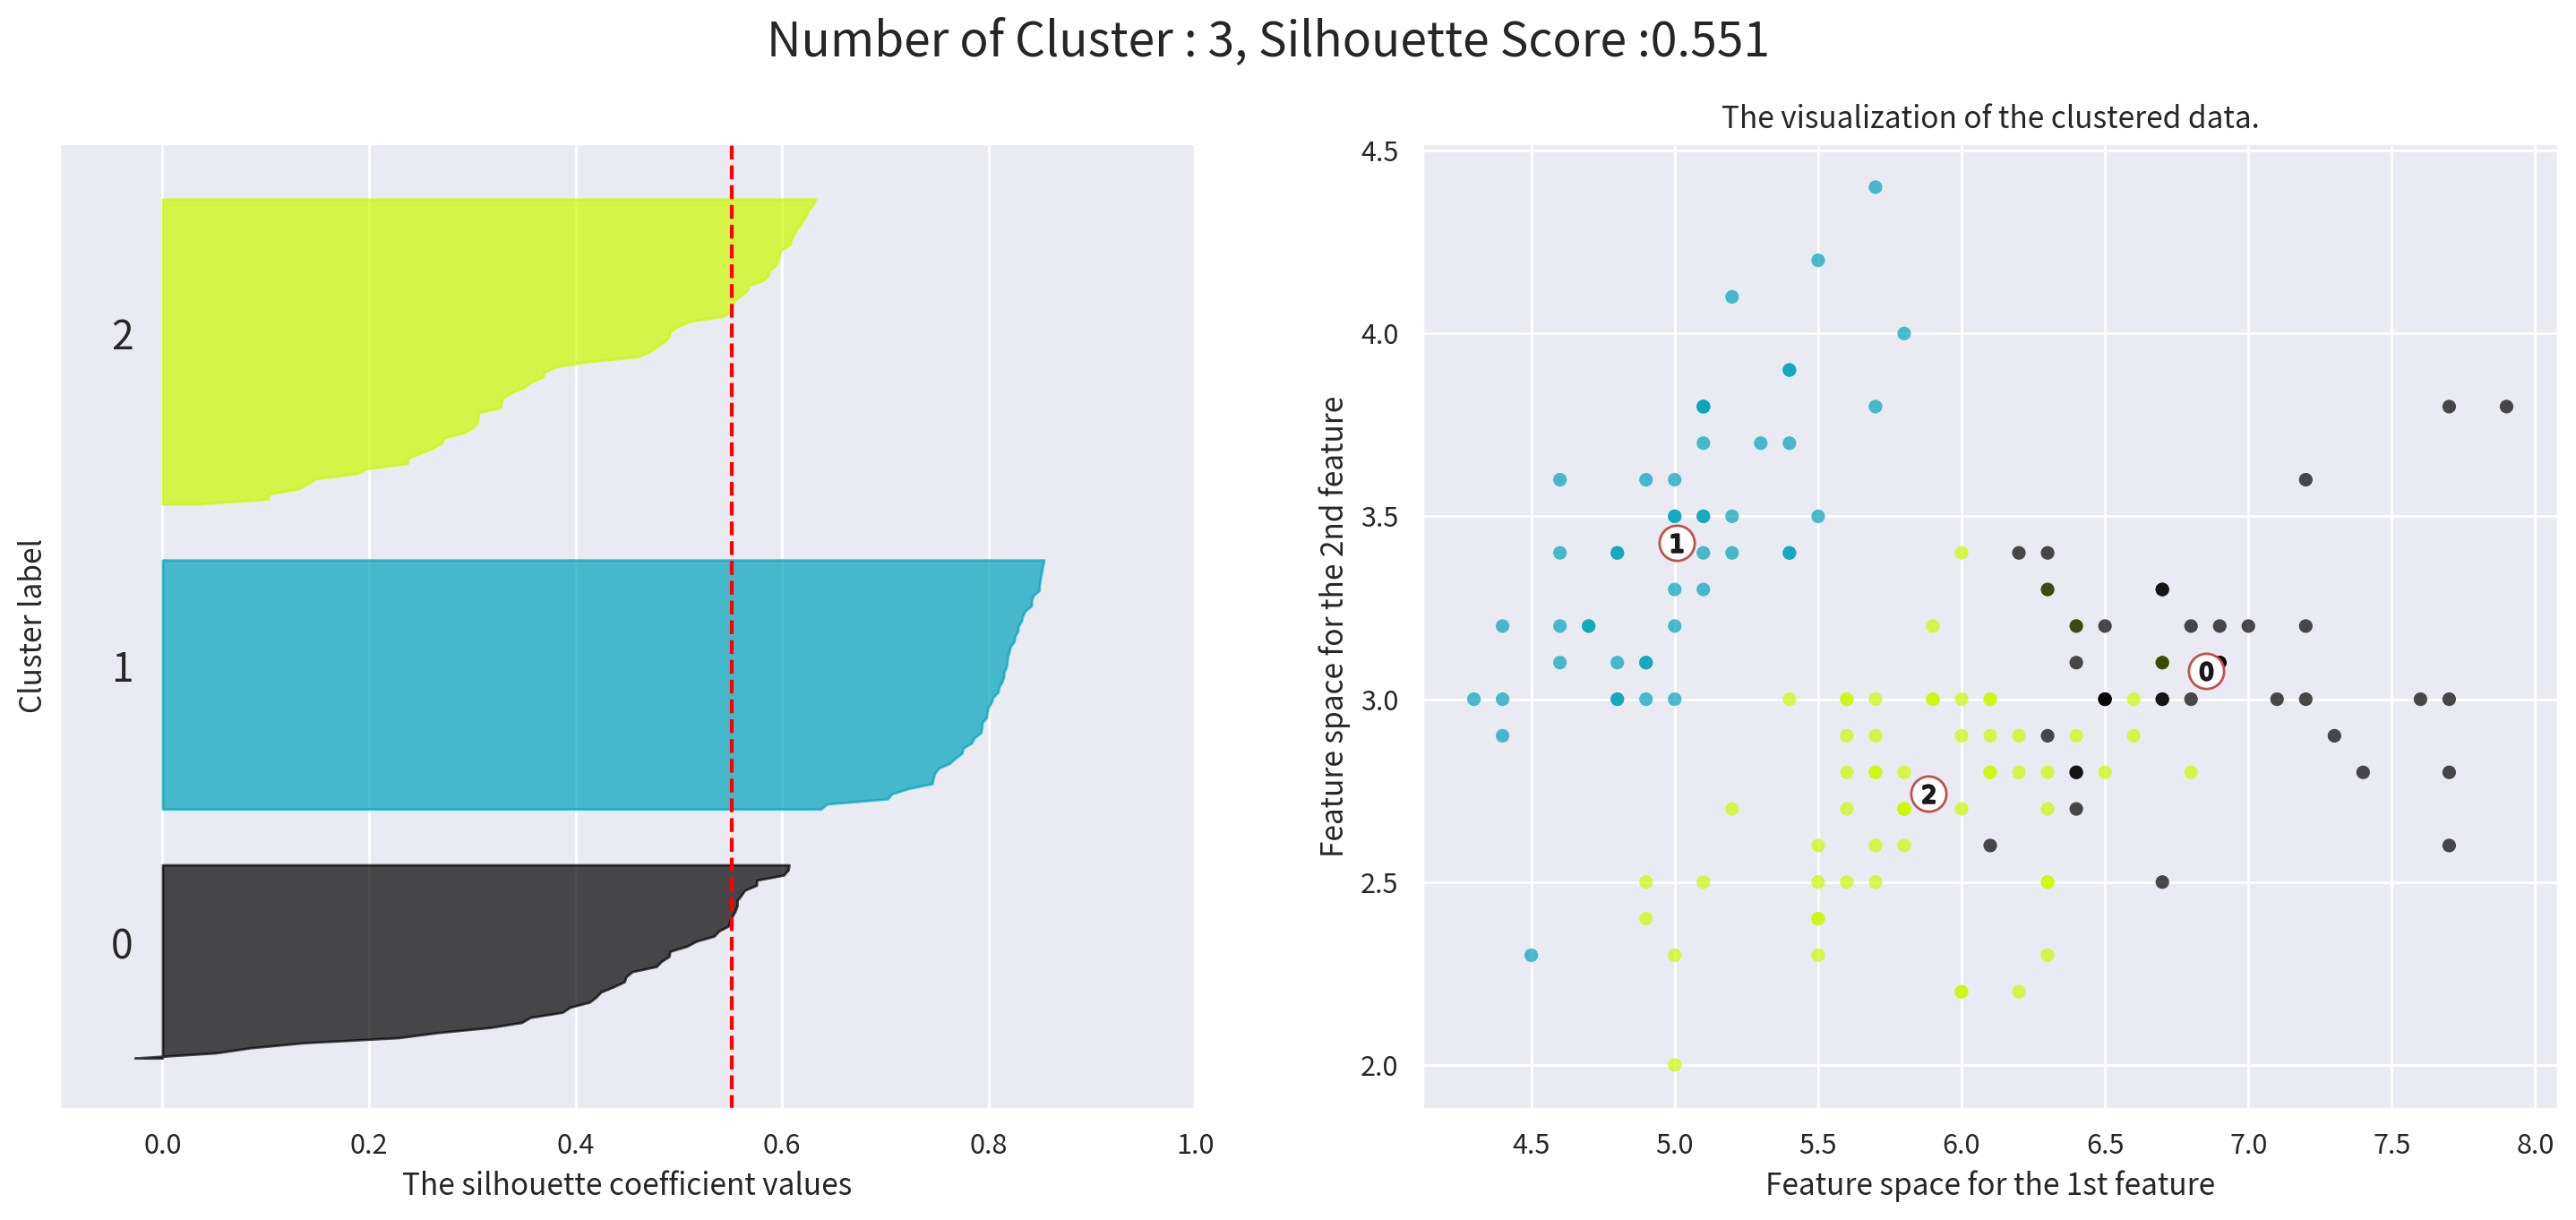

최적의 k: 3


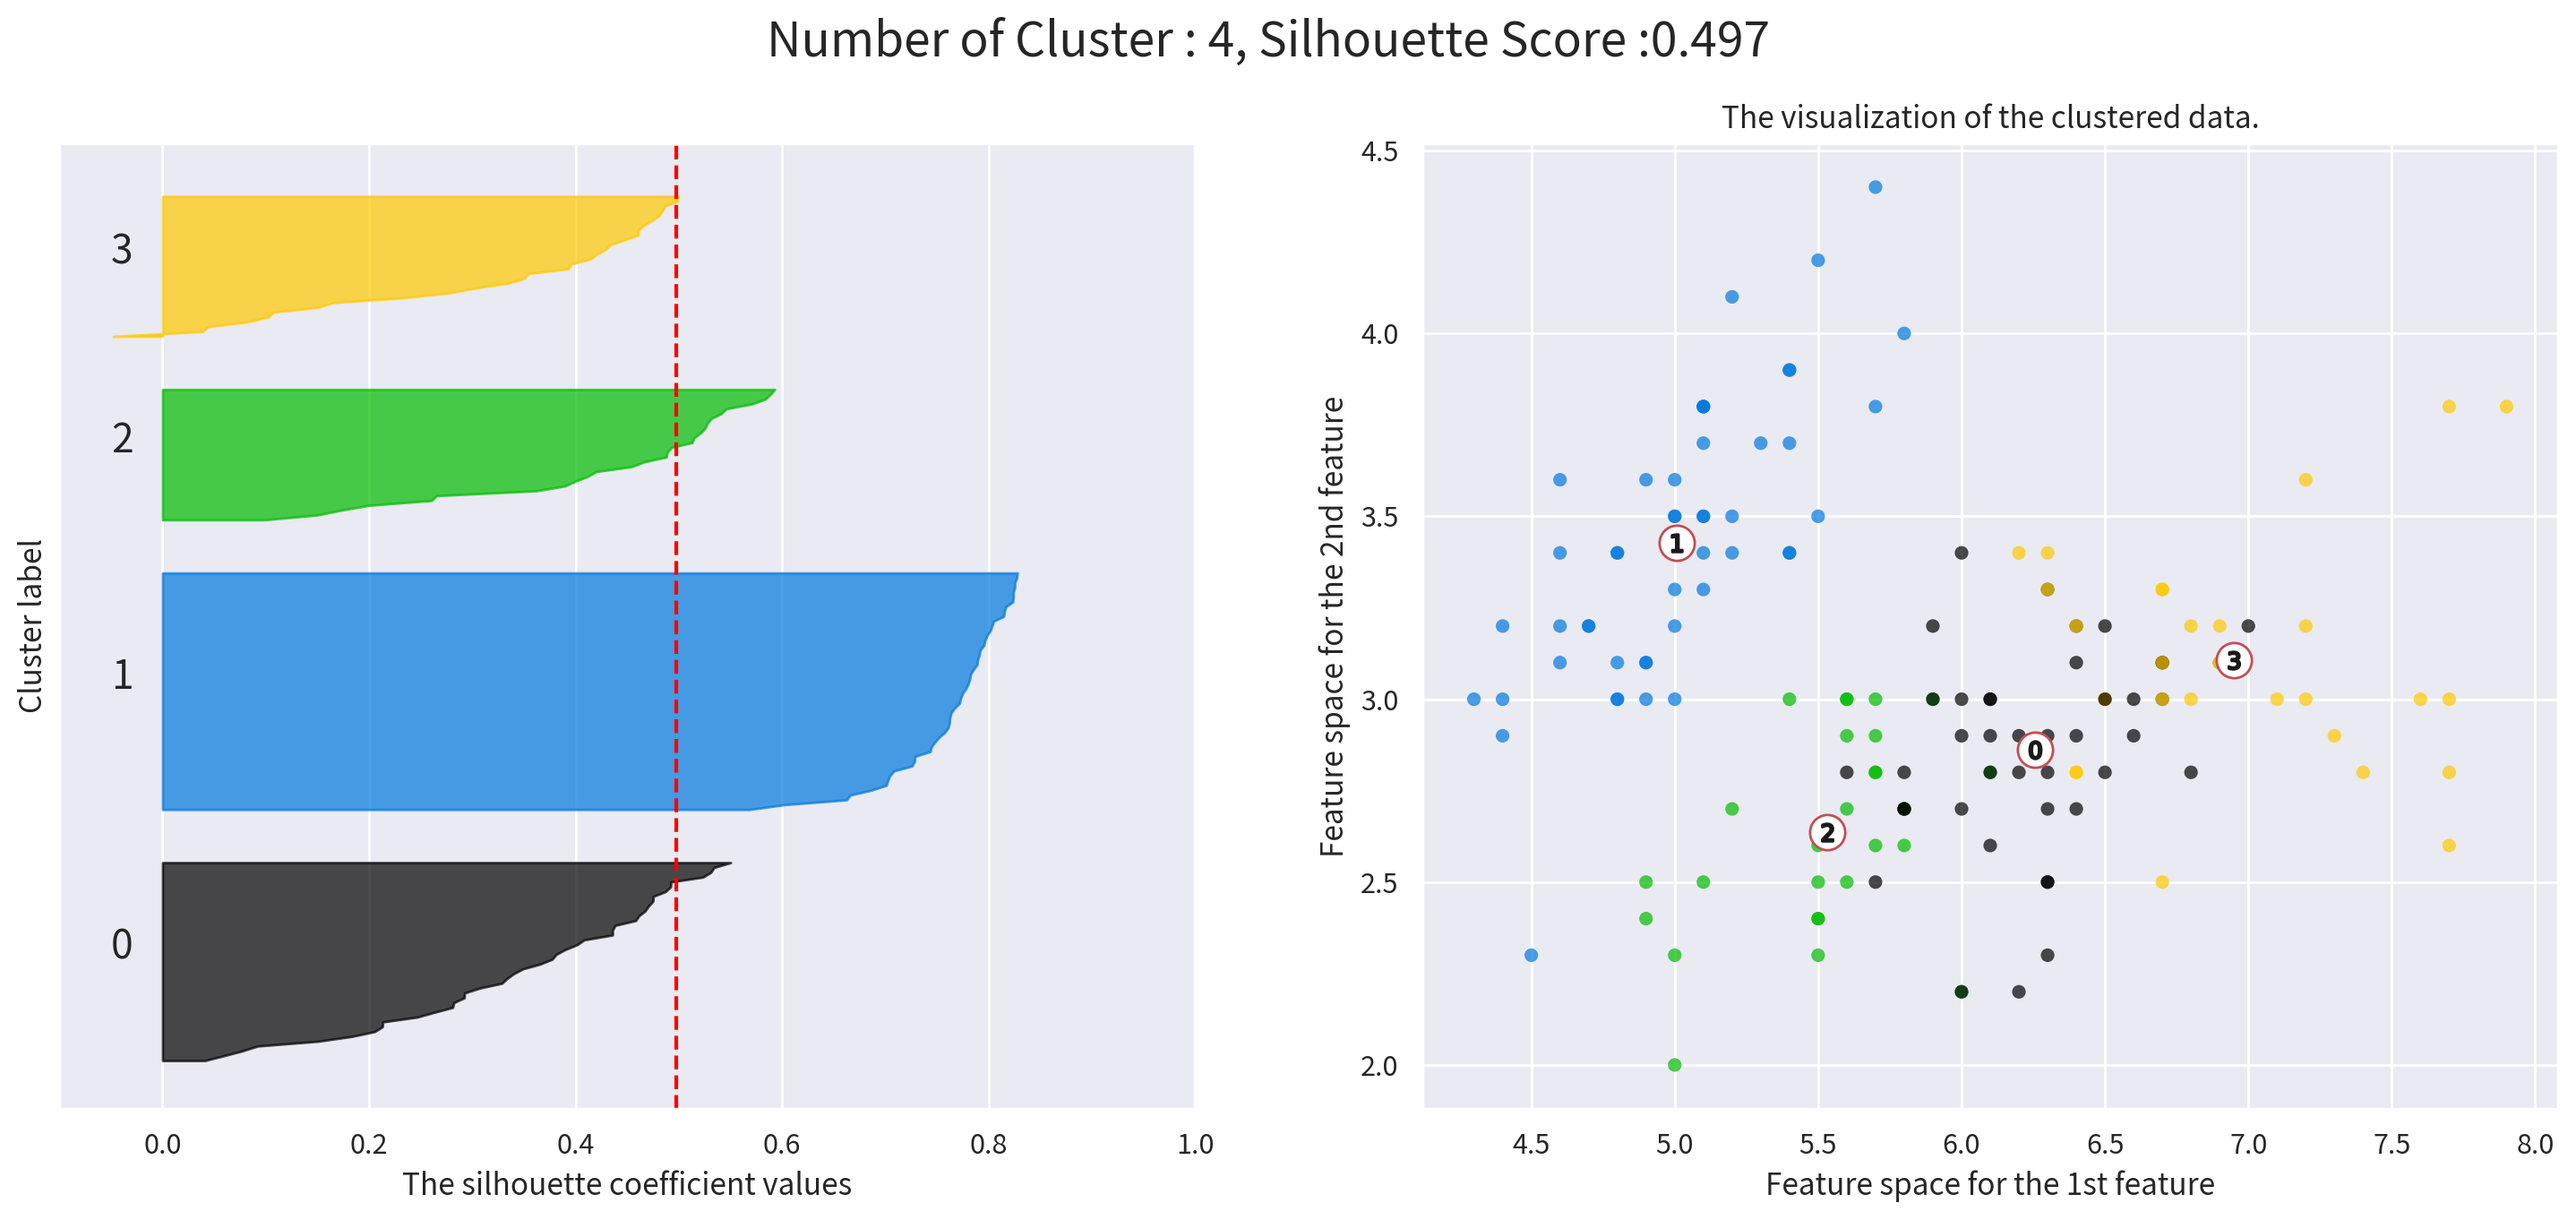

최적의 k: 3


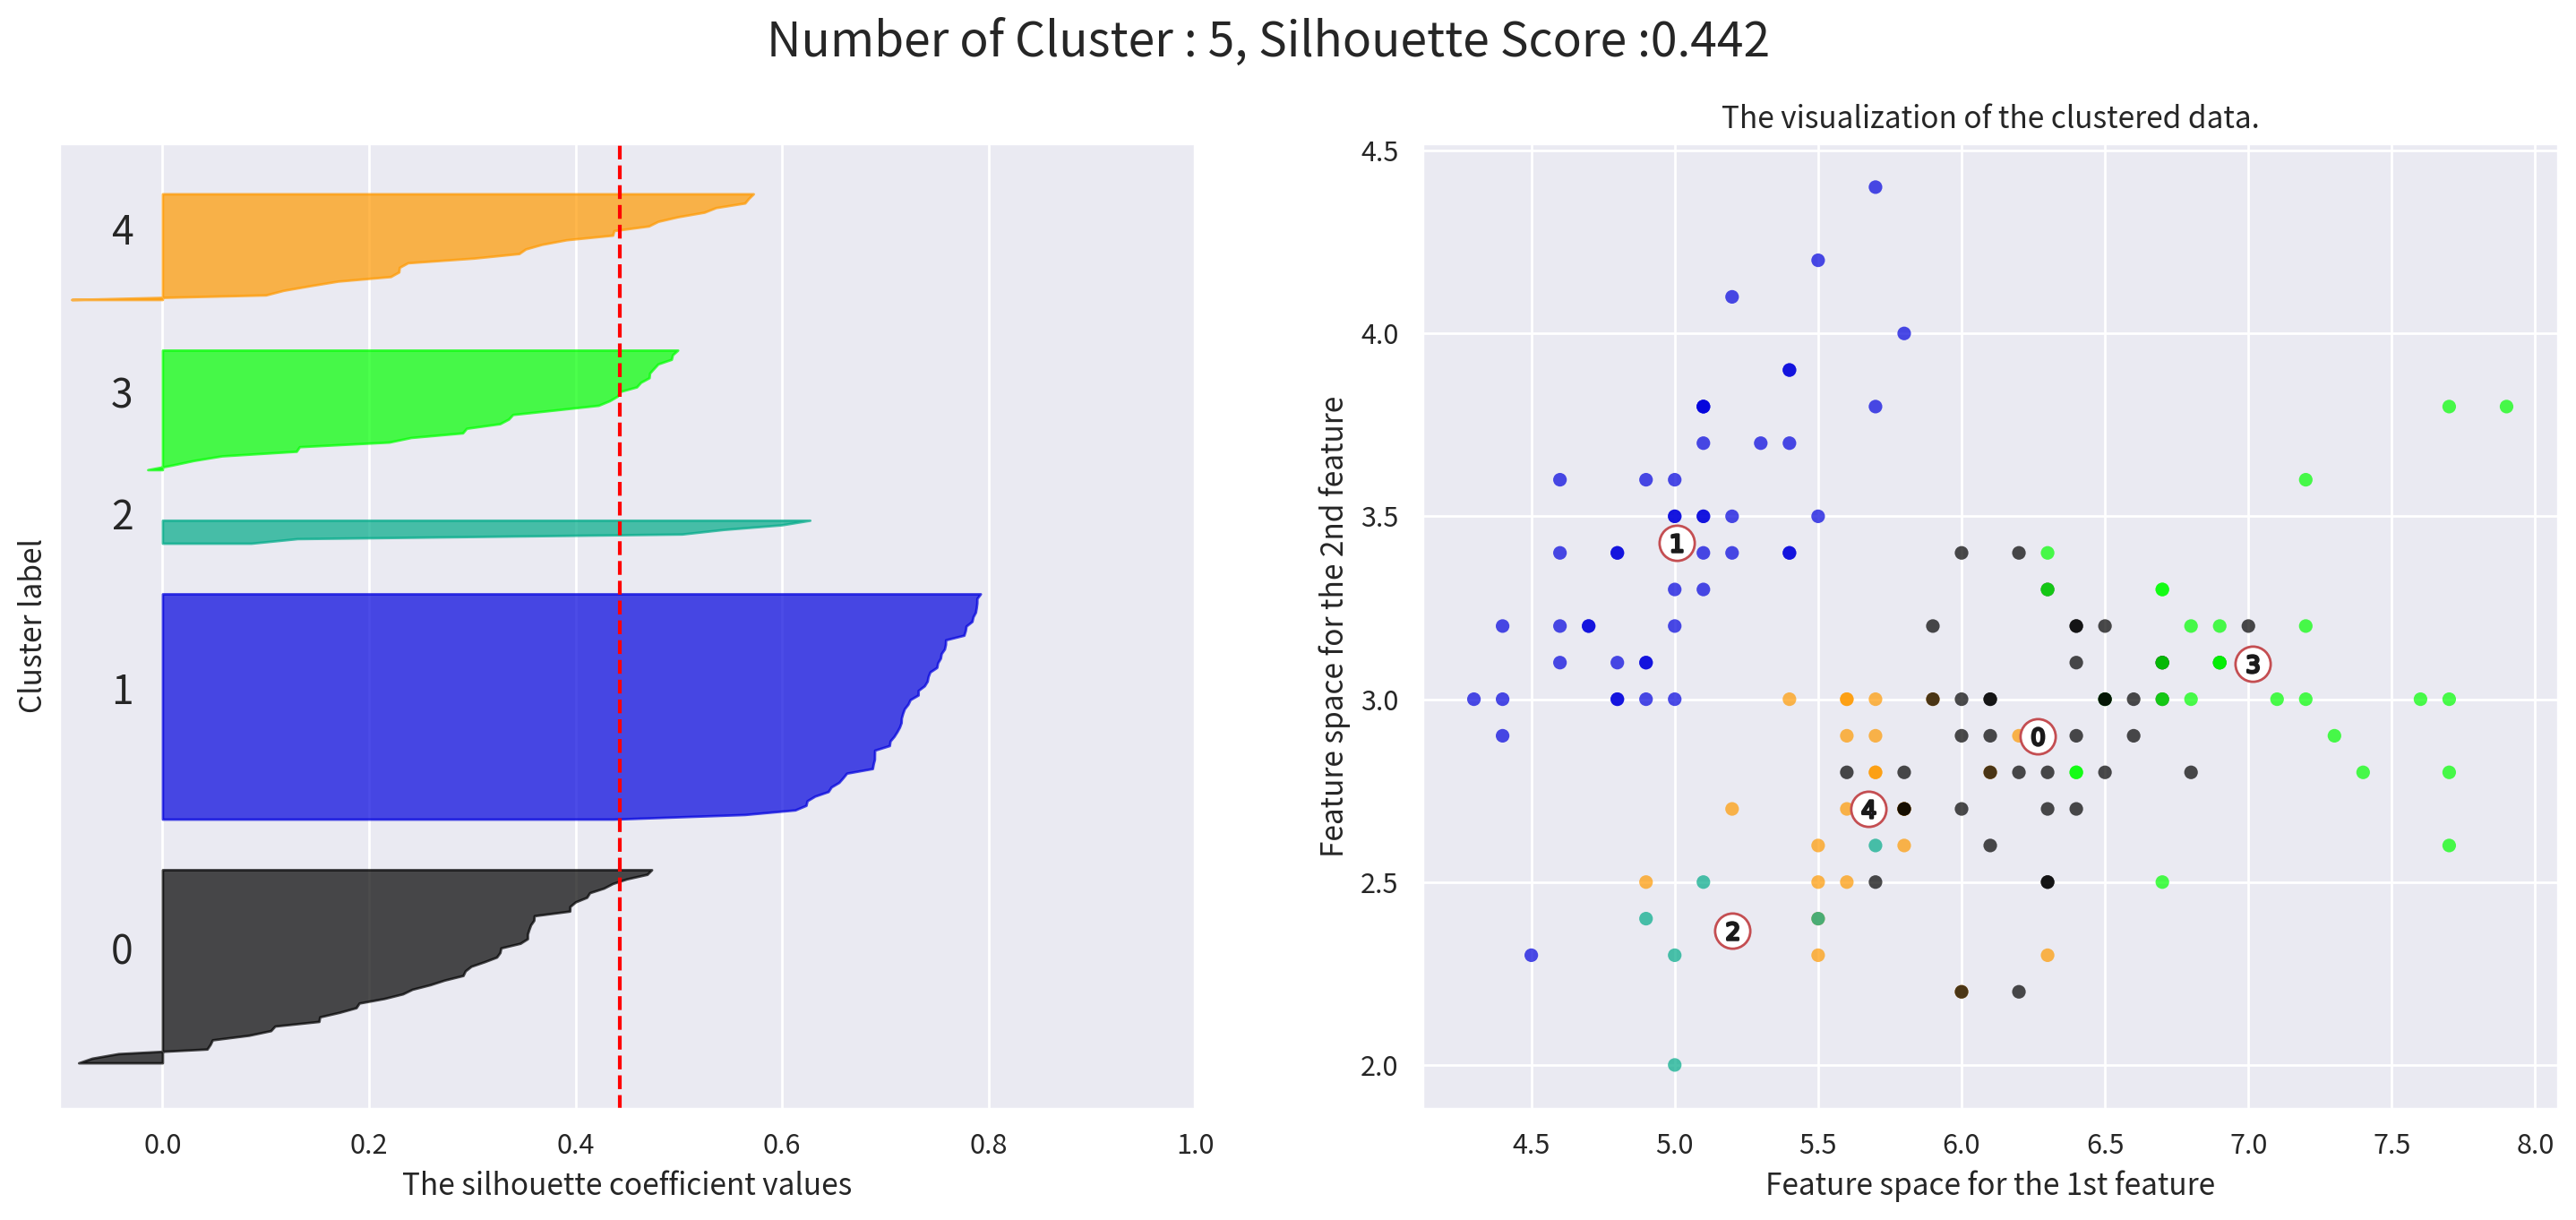

최적의 k: 3


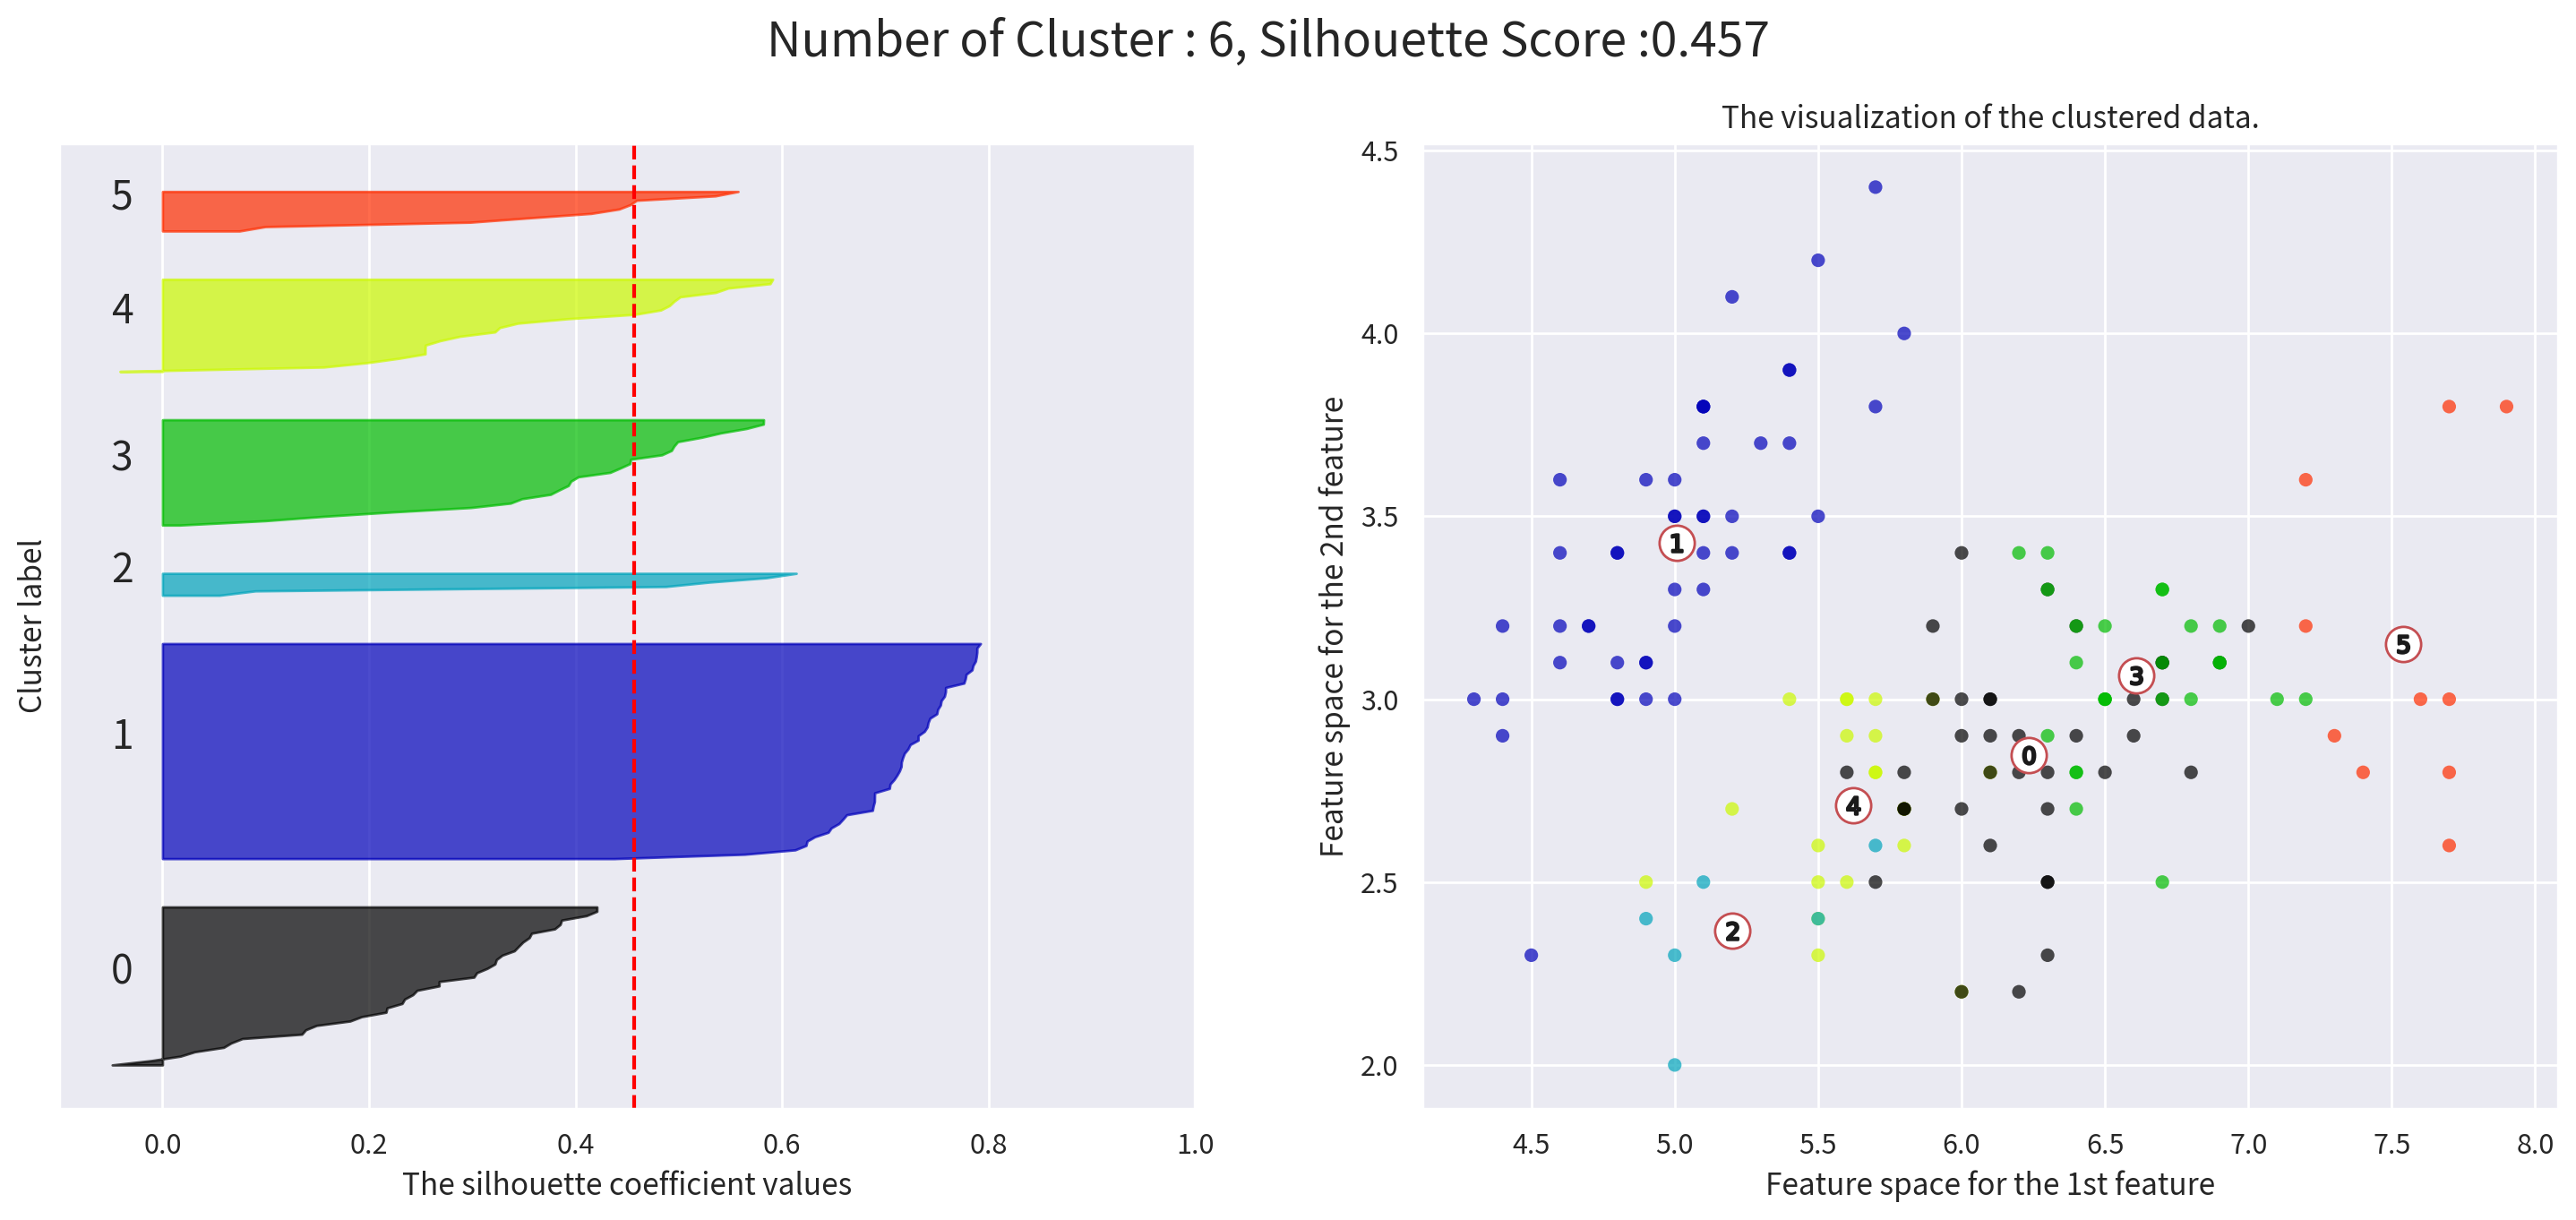

최적의 k: 3


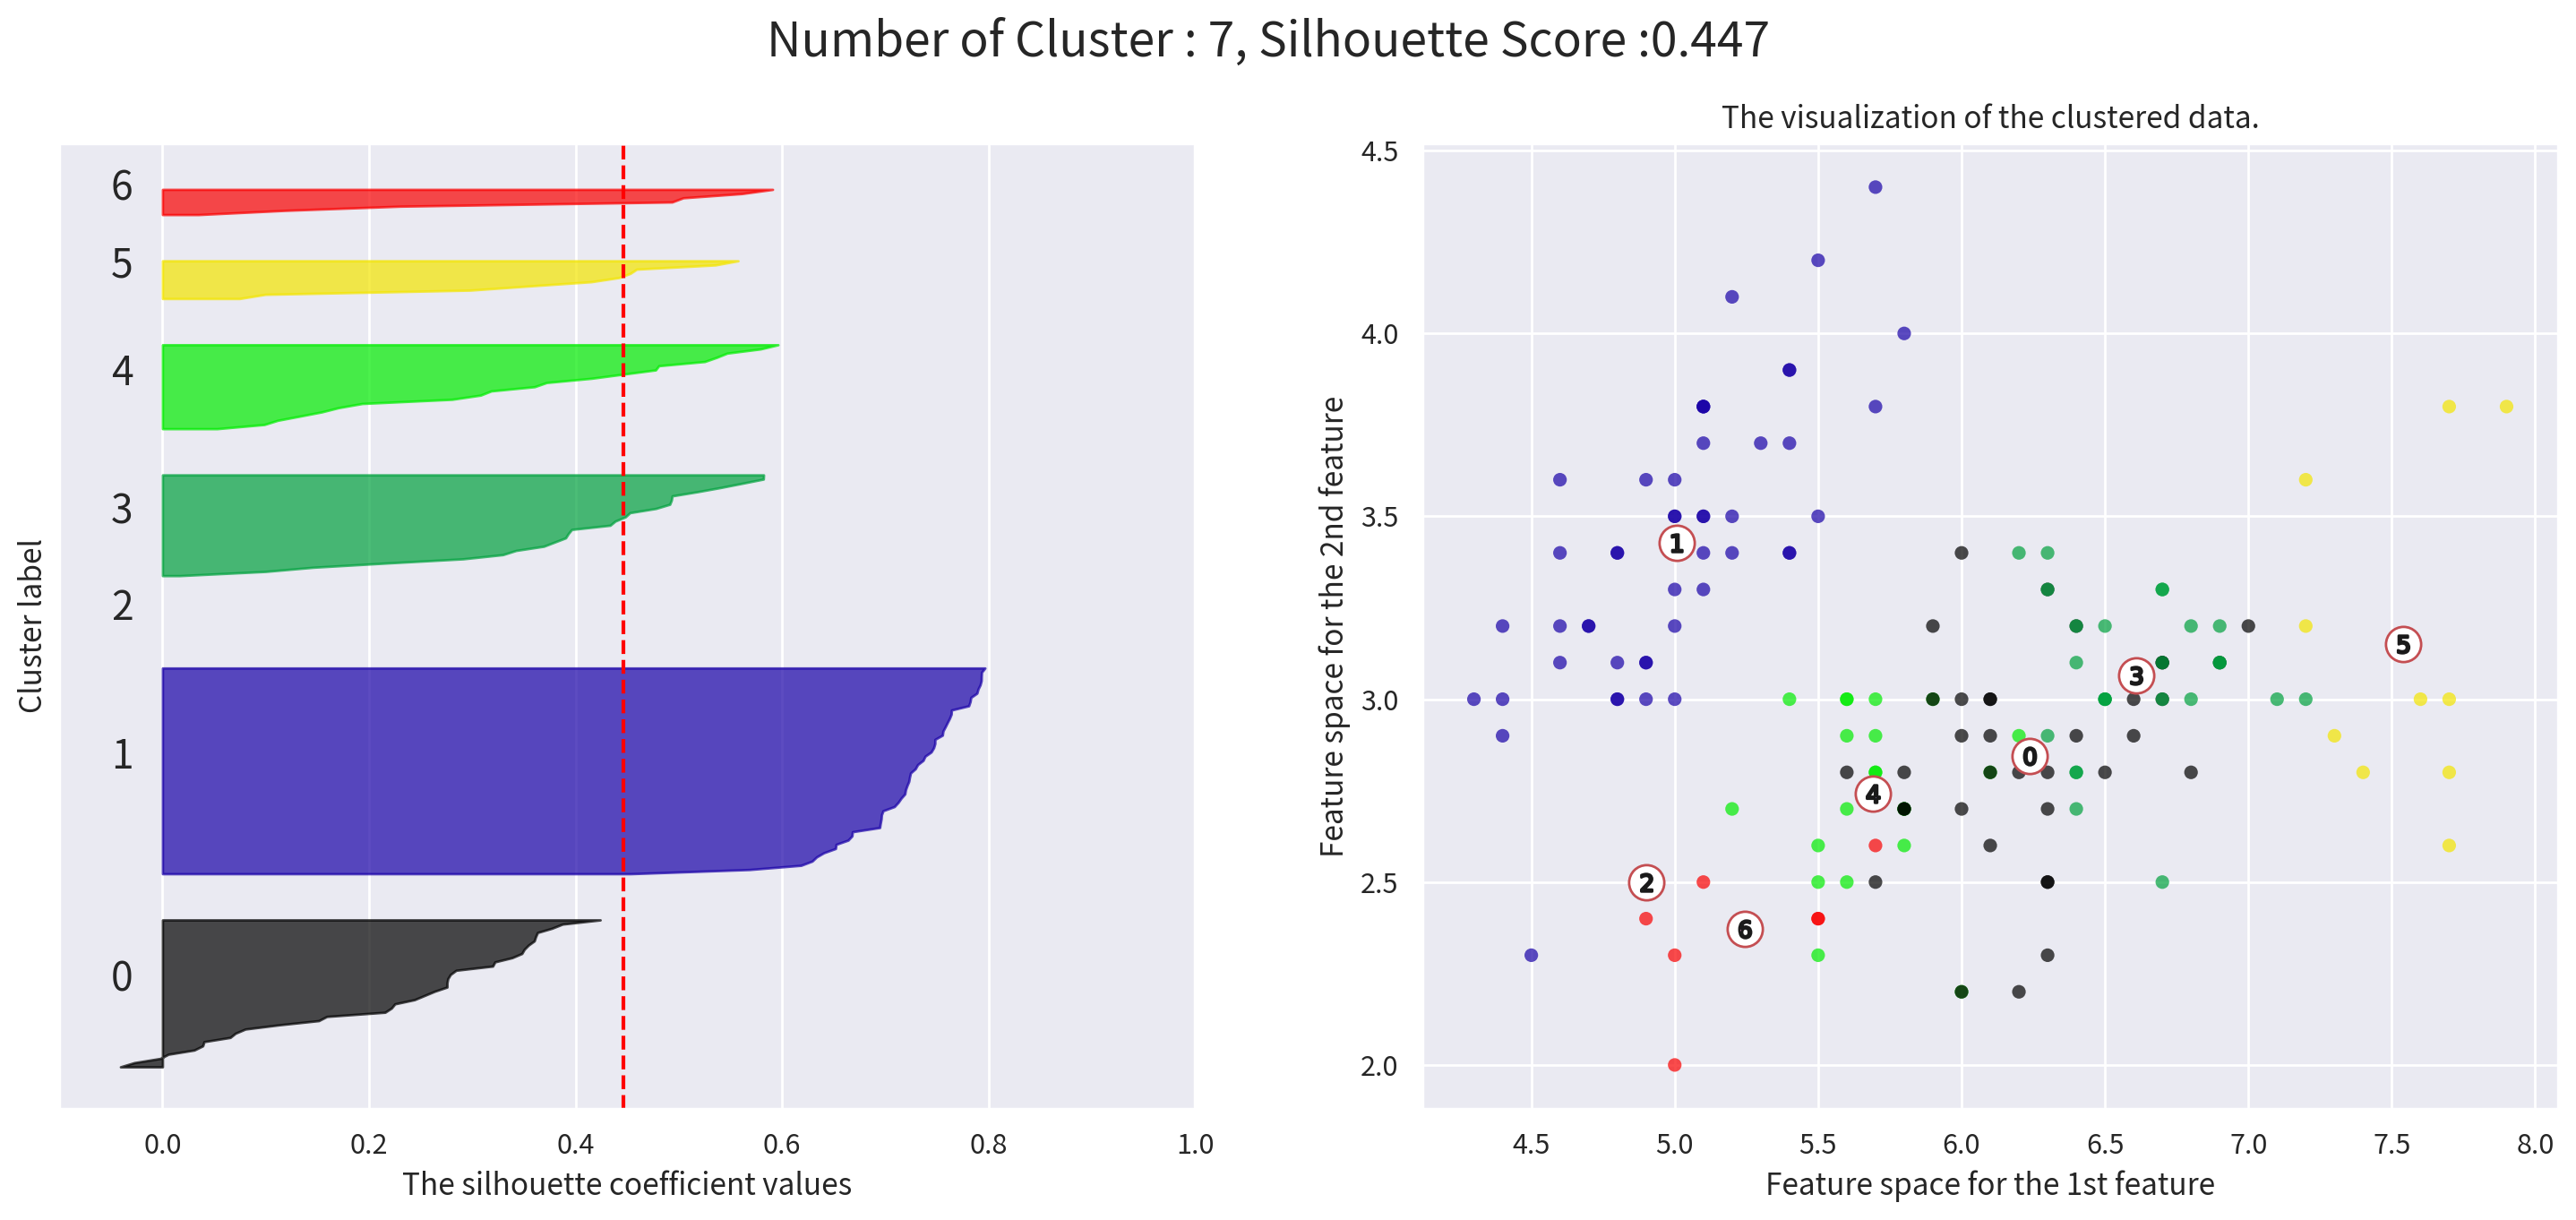

최적의 k: 3


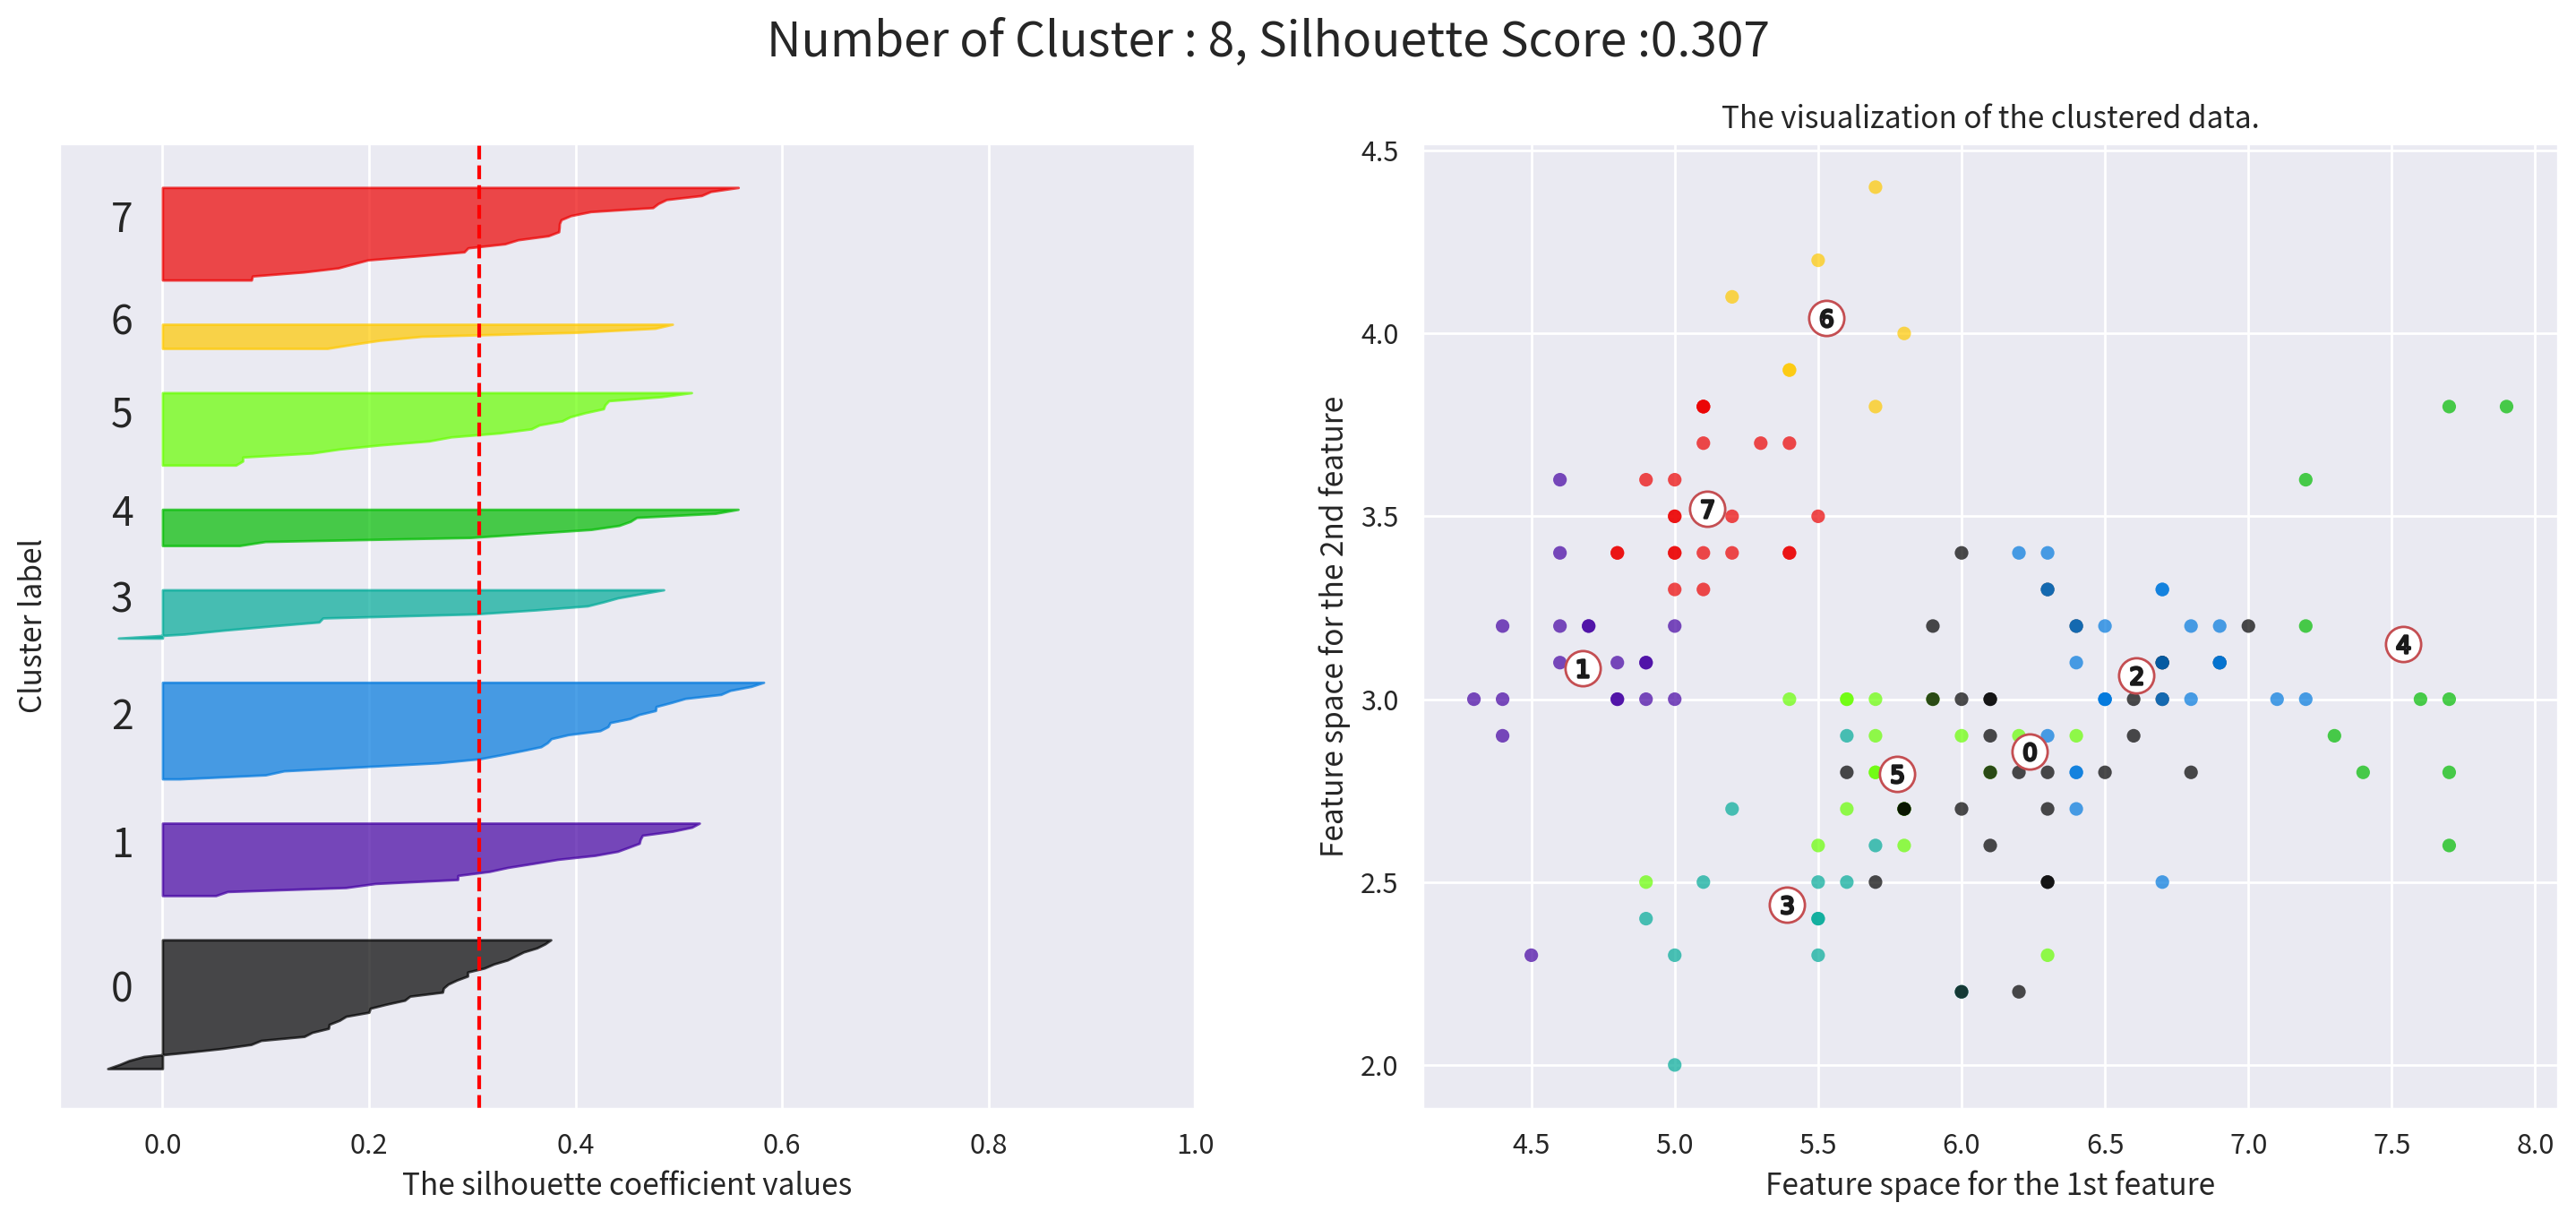

최적의 k: 3


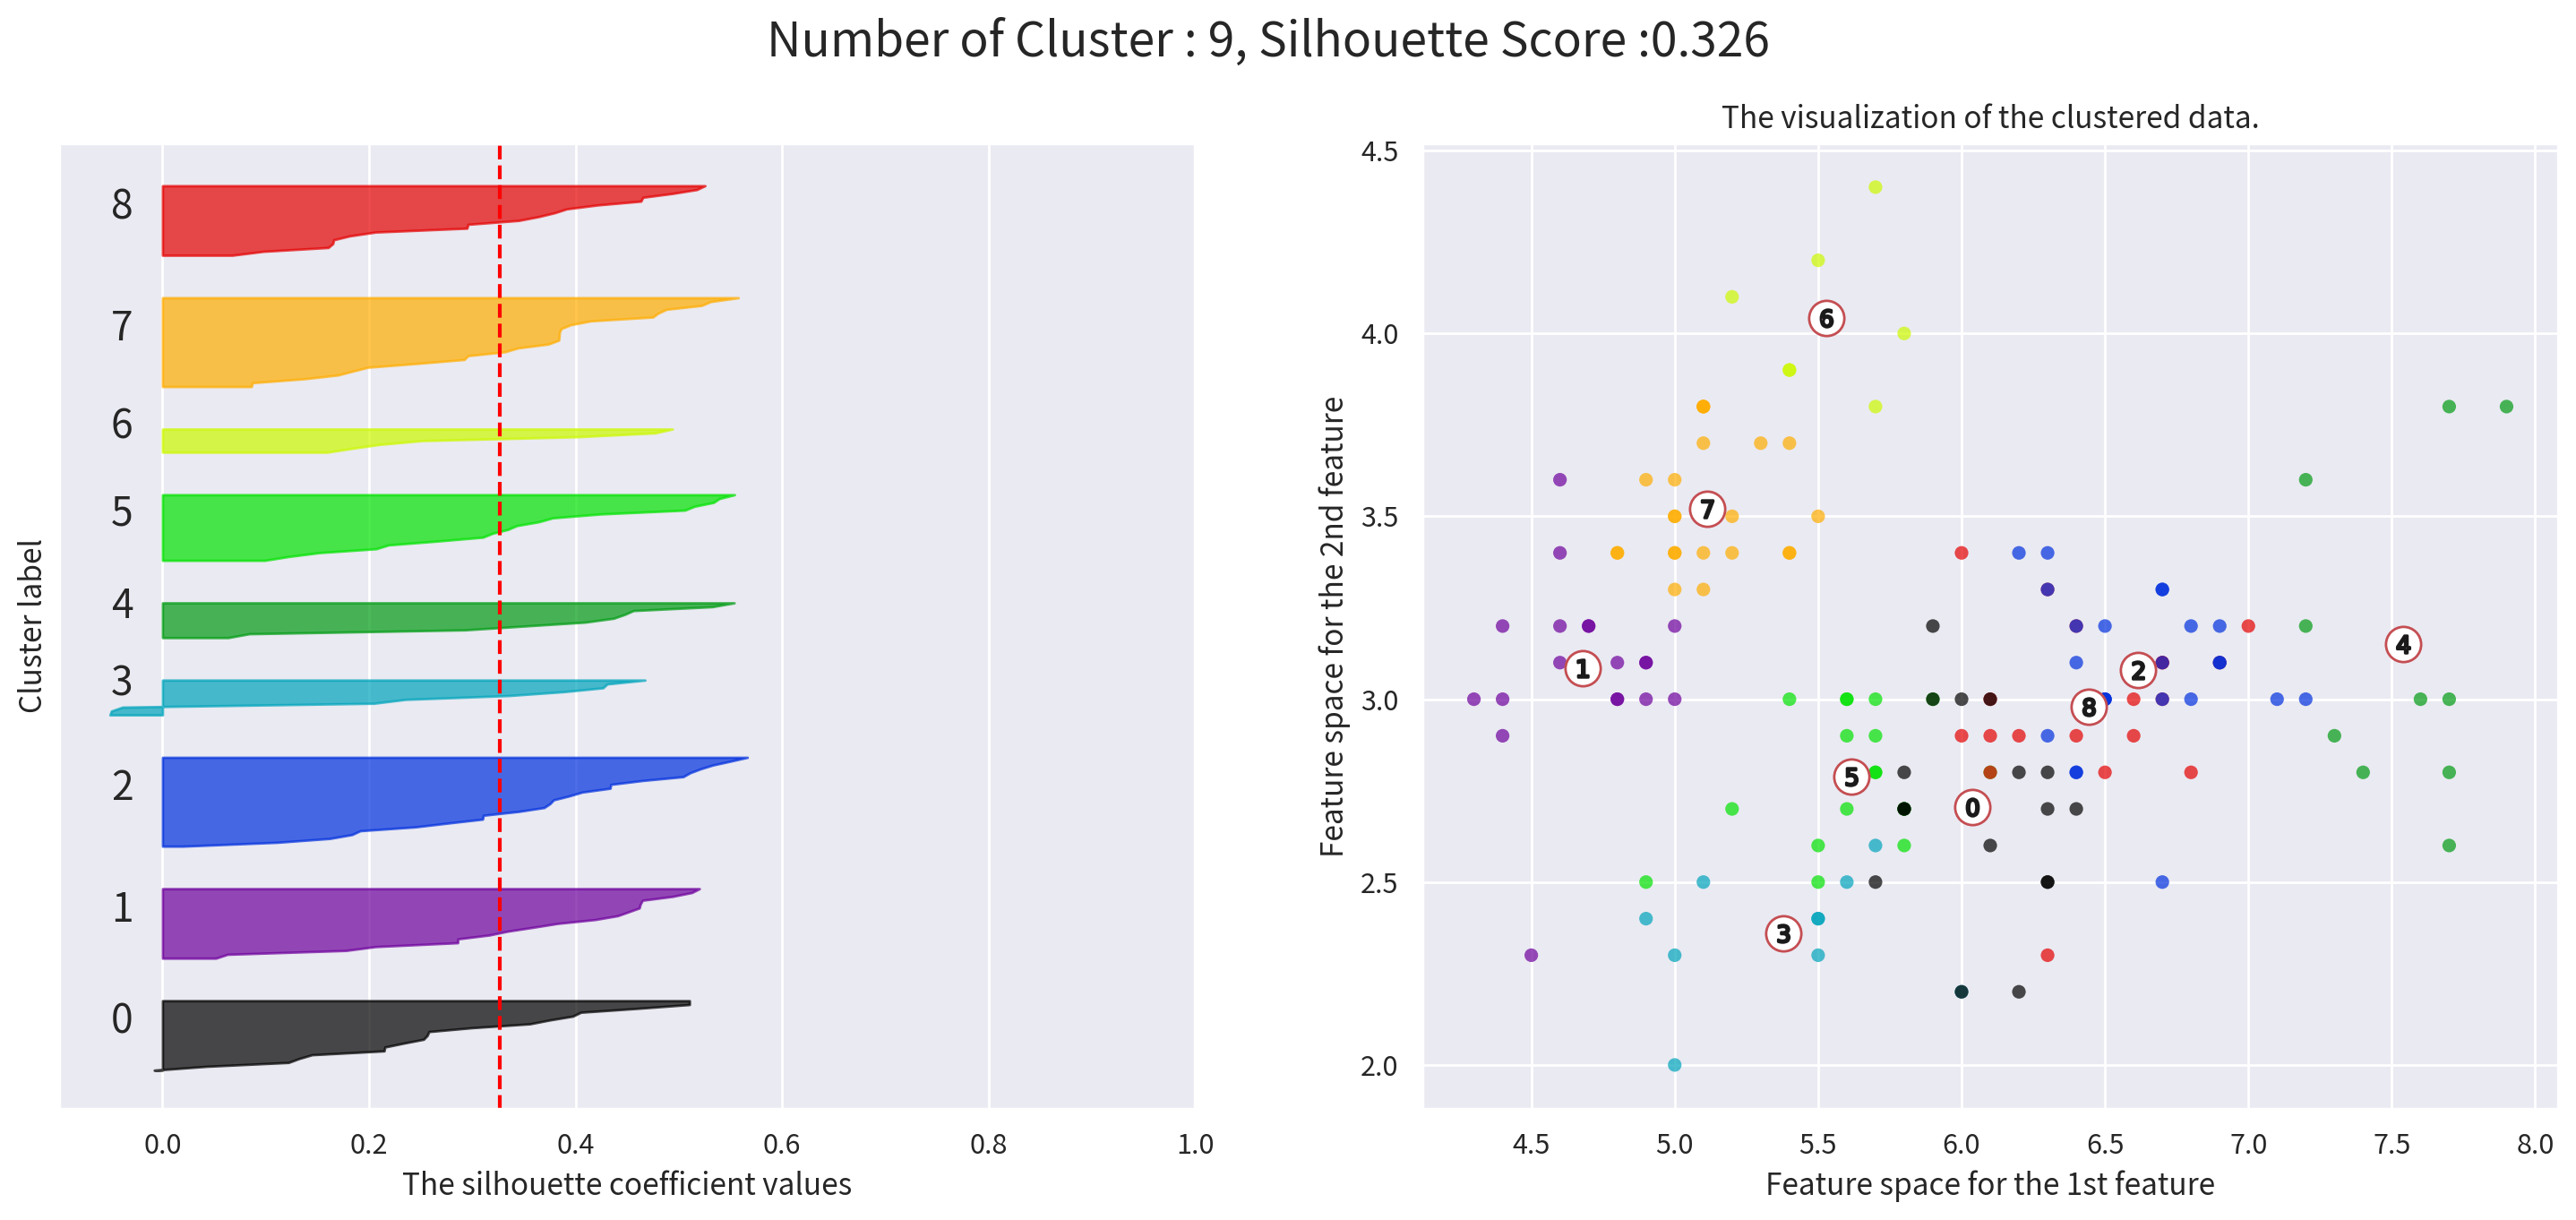

최적의 k: 3


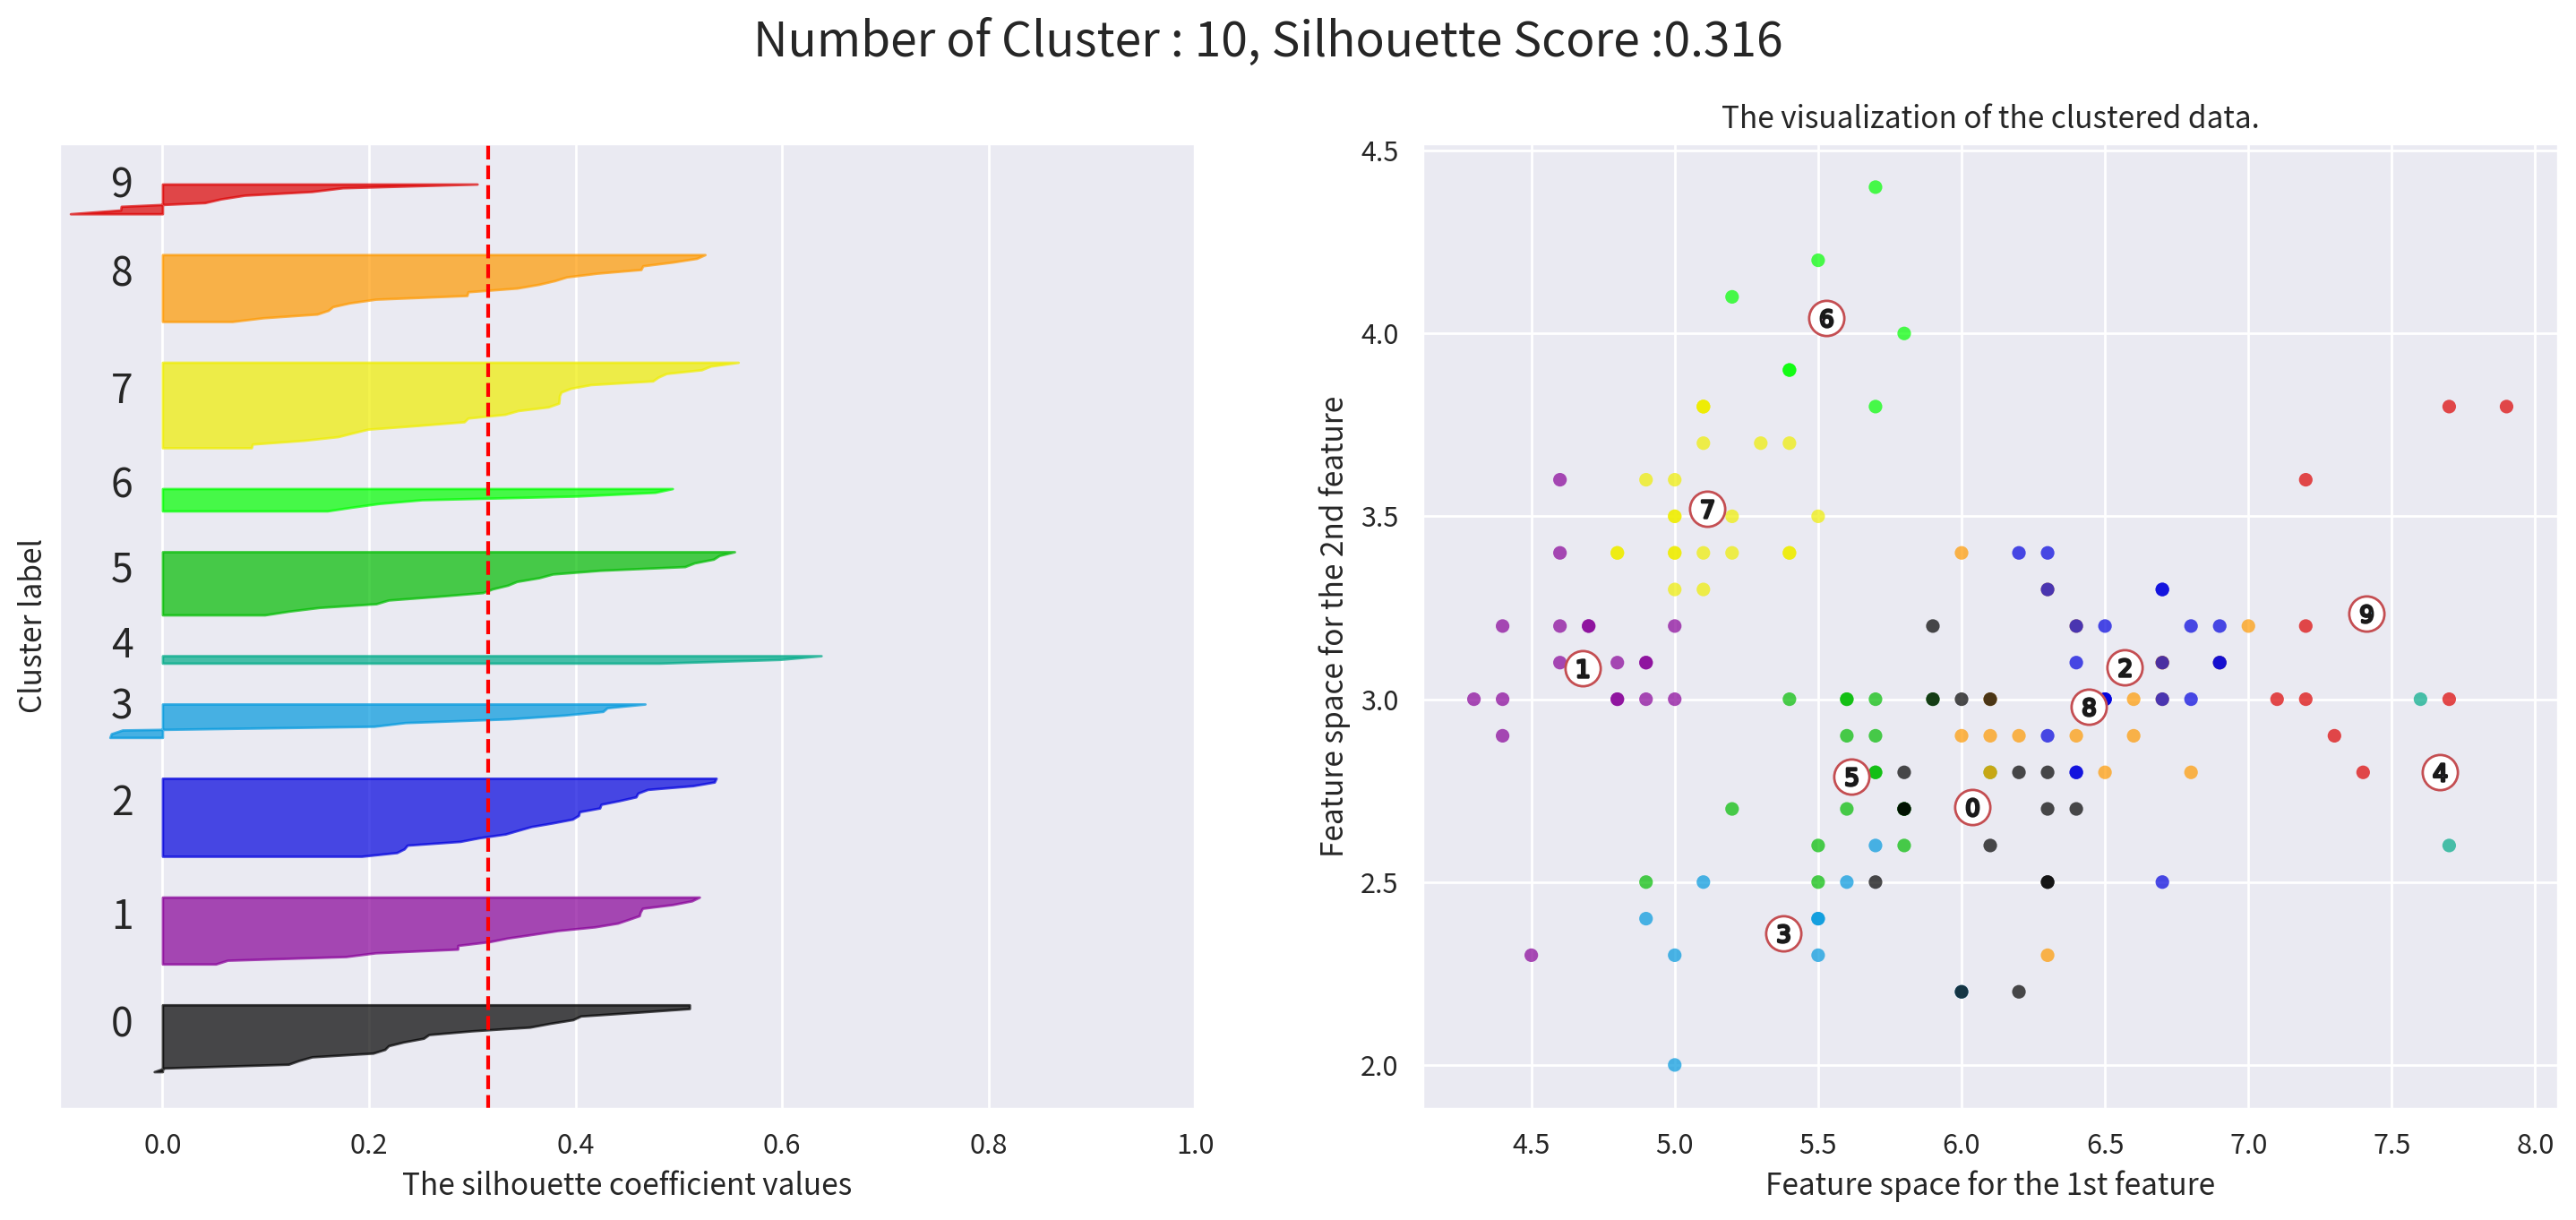

최적의 k: 3


In [25]:
#시작값은 최소 군집수 (분석가 주관으로 결정)
klist = list(range(3,11))
silhouette = [] #실루엣 스코어를 저장할 리스트

for k in klist:
  estimator = KMeans(n_clusters=k , random_state=52)
  estimator.fit(X=df)
  cluster = estimator.predict(df)
  s_score = silhouette_score (X=df , labels =cluster)
  silhouette.append(s_score)
  visualize_silhouette(estimator=estimator , X_features=df)
  best_k = klist[np.argmax(silhouette)]
  print('최적의 k:' , best_k)

#### [7] 엘보우 포인트와 실루엣에서의 추전 k 값이 상이할 수 있음

| 기준 | 엘보우(4) | 실루엣(3) |
|------|-----------|-----------|
| 오차 감소 | 더 좋음 | 덜함 |
| 군집 의미 | 애매 | 명확 |
| 데이터 구조 | 과분할 | 자연스러움 |
| 해석 가능성 | 낮음 | 높음 |


군집분석의 목적은 구조 해석이므로 실루엣 스코어를 우선으로 함

## #03. KMeans 의 실무 적용

### [1] 다중공선성 제거

- 구조 왜곡 완화 효과가 있다.
  - VIF 높음 = 강한 다중 공선성